In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_path = r'C:\Users\tiago\Desktop\code-projects\working\chest x-ray\chest_xray\train'
test_path = r'C:\Users\tiago\Desktop\code-projects\working\chest x-ray\chest_xray\test'
BATCH_SIZE = 10
image_size = (224, 224)

In [3]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    classes=['NORMAL', 'PNEUMONIA'],
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.


In [4]:
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    classes=['NORMAL', 'PNEUMONIA'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

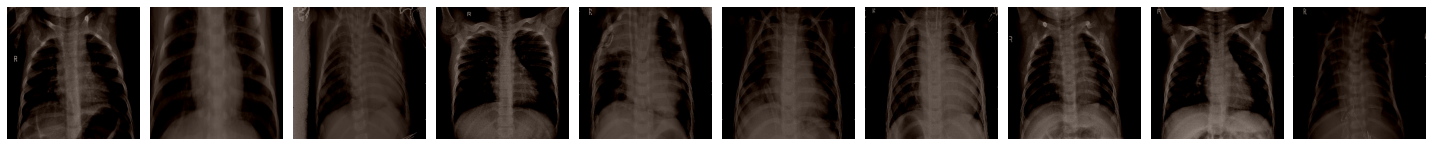

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [5]:
images, labels = next(train_batches)

def plot(img):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for imgs, ax, in zip(img, axes):
        ax.imshow(imgs)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plot(images)
print(labels)

In [6]:
model = Sequential()
model.add(Conv2D(16, (3, 3),activation=('relu'),input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, (3, 3),activation=('relu'))) #extra
model.add(MaxPooling2D(pool_size=(2, 2))) #extra

model.add(Conv2D(16, (3, 3),activation=('relu')))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1000,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(1000,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(2,activation=('softmax')))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(test_batches, epochs=13)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 16)        0

In [9]:
img = keras.preprocessing.image.load_img(
    r'C:\Users\tiago\Desktop\code-projects\working\chest x-ray\chest_xray\chest-img.jpg',
    target_size = image_size
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(score)

[1.000000e+00 7.811557e-35]
